In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import itertools  

In [4]:
sample_data = pd.read_csv('../sample_data.csv')

In [5]:
real_data = pd.read_csv('../real_data.csv')

In [6]:
sample_data[0:1000:15]

,rowid,hometeam,homescore,awayteam,awayscore,winnerteam,winnerhomeoraway,margin,total
0,1,Jets,9,Broncos,14,Broncos,away,-5,23
15,16,Jets,31,Broncos,13,Jets,home,18,44
30,31,Jets,27,Broncos,17,Jets,home,10,44
45,46,Jets,7,Broncos,26,Broncos,away,-19,33
60,61,Jets,17,Broncos,24,Broncos,away,-7,41
...,...,...,...,...,...,...,...,...,...
930,931,Titans,16,Steelers,31,Steelers,away,-15,47
945,946,Titans,21,Steelers,17,Titans,home,4,38
960,961,Titans,17,Steelers,29,Steelers,away,-12,46
975,976,Titans,16,Steelers,34,Steelers,away,-18,50


In [7]:
real_data

,rowid,hometeam,homescore,awayteam,awayscore,winnerteam,winnerhomeoraway,margin,total
0,1,Jets,28,Broncos,37,Broncos,away,-9,65
1,2,Panthers,31,Cardinals,21,Cardinals,home,10,52
2,3,Bears,11,Colts,19,Bears,away,-8,30
3,4,Bengals,33,Jaguars,25,Bengals,home,8,58
4,5,Cowboys,38,Browns,49,Browns,away,-11,87
5,6,Lions,29,Saints,35,Saints,away,-6,64
6,7,Texans,23,Vikings,31,Vikings,away,-8,54
7,8,Dolphins,23,Seahawks,31,Seahawks,away,-8,54
8,9,Buccaneers,38,Chargers,31,Buccaneers,home,7,69
9,10,Titans,0,Steelers,0,Steelers,tie,0,0


In [9]:
nfl_marg_d={}
homecount = len(set(sample_data.hometeam))
for i,home_t in enumerate(set(sample_data.hometeam)):
    home_all_marg = list((sample_data[sample_data.hometeam == home_t]).margin)
    home_avg_marg = sum(home_all_marg)/len(home_all_marg)
    nfl_marg_d[i] = (home_t,home_avg_marg)
for j, away_t in enumerate(set(sample_data.awayteam)):
    away_all_marg = list((sample_data[sample_data.awayteam == away_t]).margin)
    away_avg_marg = sum(away_all_marg)/len(away_all_marg)
    nfl_marg_d[j+homecount] = (away_t, -away_avg_marg)
dict(itertools.islice(nfl_marg_d.items(), 5))

{0: ('Jets', -4.97),
 1: ('Cowboys', -0.34),
 2: ('Bengals', -4.0),
 3: ('Texans', 2.05),
 4: ('Buccaneers', -6.47)}

In [11]:
from itertools import count
nfl_comp_marg_d={}
num_games = len(real_data)
for i,team in enumerate(zip(count(step=2),real_data.hometeam,real_data.awayteam)):
    r_home_team = team [1]
    r_home_marg = int(real_data.margin[real_data.hometeam == r_home_team])
    r_away_team = team [2]
    r_away_marg = -r_home_marg
    nfl_comp_marg_d[i] = (r_home_team,r_home_marg)
    nfl_comp_marg_d[i+num_games] = (r_away_team,r_away_marg)

In [12]:
from itertools import count
d_cmp={}
num_games = len(real_data)
for i,team in enumerate(zip(count(step=2),real_data.hometeam,real_data.awayteam)):
    r_home_team = team [1]
    r_away_team = team [2]
    
    r_home_marg = int(real_data.margin[real_data.hometeam == r_home_team])
    r_away_marg = -r_home_marg
    
    p_home_all_marg = list((sample_data[sample_data.hometeam == r_home_team]).margin)
    p_home_marg = sum(p_home_all_marg)/len(p_home_all_marg)
    
    #p_away_all_marg = list((sample_data[sample_data.away == r_away_team]).margin)
    #p_away_marg = sum(p_away_all_marg)/len(p_away_all_marg)
    p_away_marg = -p_home_marg
    
    d_home_marg = r_home_marg - p_home_marg
    d_away_marg = r_away_marg - p_away_marg
    
    d_cmp[i] = (r_home_team,d_home_marg)
    d_cmp[i+num_games] = (r_away_team,d_away_marg)

In [13]:
d_cmp

{0: ('Jets', -4.03),
 16: ('Broncos', 4.03),
 1: ('Panthers', 11.06),
 17: ('Cardinals', -11.06),
 2: ('Bears', -0.6600000000000001),
 18: ('Colts', 0.6600000000000001),
 3: ('Bengals', 12.0),
 19: ('Jaguars', -12.0),
 4: ('Cowboys', -10.66),
 20: ('Browns', 10.66),
 5: ('Lions', -0.7800000000000002),
 21: ('Saints', 0.7800000000000002),
 6: ('Texans', -10.05),
 22: ('Vikings', 10.05),
 7: ('Dolphins', 10.86),
 23: ('Seahawks', -10.86),
 8: ('Buccaneers', 13.469999999999999),
 24: ('Chargers', -13.469999999999999),
 9: ('Titans', 14.03),
 25: ('Steelers', -14.03),
 10: ('Redskins', -0.6600000000000001),
 26: ('Ravens', 0.6600000000000001),
 11: ('Rams', -3.3499999999999996),
 27: ('Giants', 3.3499999999999996),
 12: ('Chiefs', 12.33),
 28: ('Patriots', -12.33),
 13: ('Raiders', -3.87),
 29: ('Bills', 3.87),
 14: ('49ers', -19.79),
 30: ('Eagles', 19.79),
 15: ('Packers', -1.4000000000000004),
 31: ('Falcons', 1.4000000000000004)}

In [14]:
df_marg = pd.DataFrame.from_dict(nfl_marg_d, orient='index',columns = ['team','margin'])
df_marg_team = df_marg.sort_values(by=['team'],ignore_index=True,ascending = False)
df_marg_top = df_marg.sort_values(by=['margin'],ignore_index=True,ascending = False)
df_marg_bot = df_marg.sort_values(by=['margin'],ignore_index=True,ascending = True)
#display(df_marg_top[:5])
#df_marg_bot[:5]
df_marg_team[:5]

,team,margin
0,Vikings,-2.05
1,Titans,-14.03
2,Texans,2.05
3,Steelers,14.03
4,Seahawks,18.86


In [15]:
df_comp_marg = pd.DataFrame.from_dict(nfl_comp_marg_d, orient='index',columns = ['team','margin'])
df_comp_marg_team = df_comp_marg.sort_values(by=['team'],ignore_index=True,ascending = False)
df_comp_marg_top = df_comp_marg.sort_values(by=['margin'],ignore_index=True,ascending = False)
df_comp_marg_bot = df_comp_marg.sort_values(by=['margin'],ignore_index=True,ascending = True)
#df_comp_marg_top[:5])
#df_comp_marg_bot[:5]
df_comp_marg_team[:5]

,team,margin
0,Vikings,8
1,Titans,0
2,Texans,-8
3,Steelers,0
4,Seahawks,8


In [16]:
df_cmp = pd.DataFrame.from_dict(d_cmp, orient='index',columns = ['team','diff_margin'])
df_cmp = df_cmp.sort_values(by=['team'],ignore_index=True,ascending = False)
df_cmp['r_margin'] = df_comp_marg_team['margin']
df_cmp['p_margin'] = df_marg_team['margin']
df_cmp_marg_srt = df_cmp.sort_values(by=['diff_margin'],ignore_index=True,ascending = False)
df_cmp_marg_srt

,team,diff_margin,r_margin,p_margin
0,Eagles,19.79,5,-14.79
1,Titans,14.03,0,-14.03
2,Buccaneers,13.47,7,-6.47
3,Chiefs,12.33,16,3.67
4,Bengals,12.00,8,-4.00
5,Panthers,11.06,10,-1.06
6,Dolphins,10.86,-8,-18.86
7,Browns,10.66,11,0.34
8,Vikings,10.05,8,-2.05
9,Broncos,4.03,9,4.97


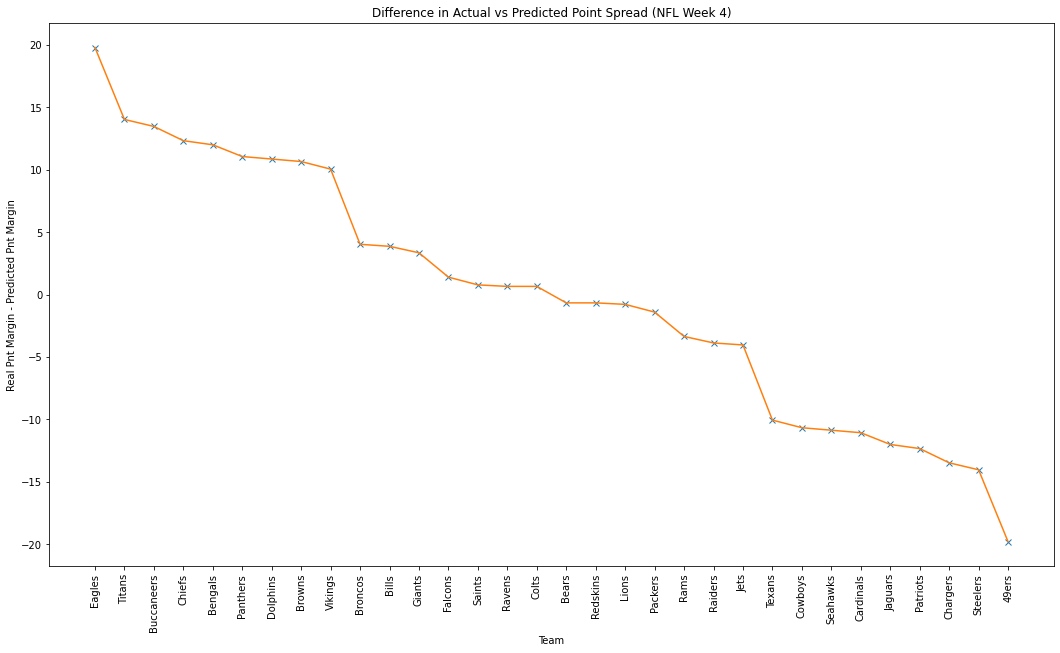

In [17]:
from matplotlib.pyplot import figure
plt.figure(figsize = (18,10))
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin,'x')
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Real Pnt Margin - Predicted Pnt Margin')
plt.title('Difference in Actual vs Predicted Point Spread (NFL Week 4)')
plt.show()

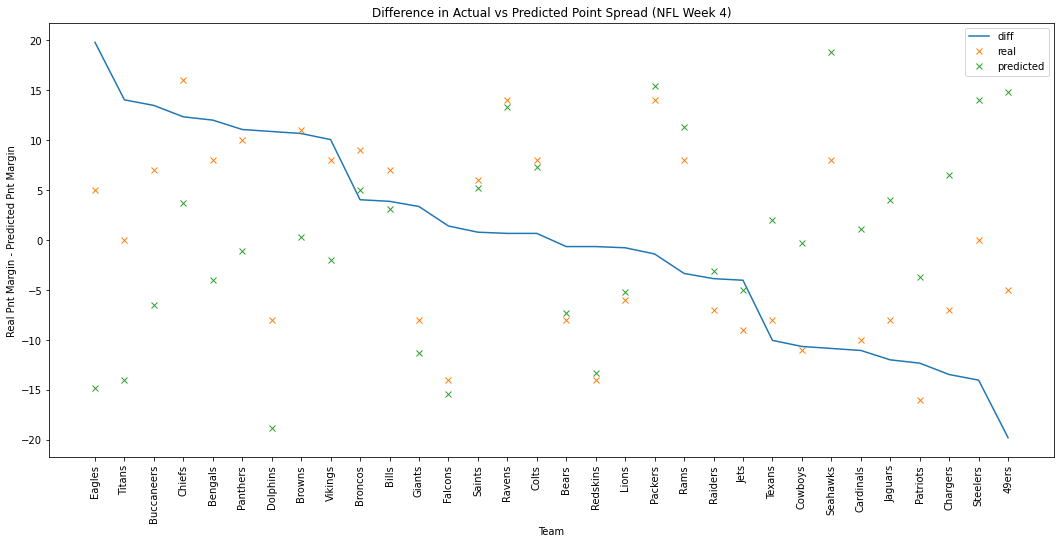

In [19]:
from matplotlib.pyplot import figure
plt.figure(figsize = (18,8))
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.diff_margin)
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.r_margin,'x')
plt.plot(df_cmp_marg_srt.team,df_cmp_marg_srt.p_margin,'x')
plt.legend(['diff', 'real', 'predicted'])
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Real Pnt Margin - Predicted Pnt Margin')
plt.title('Difference in Actual vs Predicted Point Spread (NFL Week 4)')
plt.show()